# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, precision_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
region1 = pd.read_csv('/datasets/geo_data_0.csv')
region1.head(10)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


In [3]:
region2 = pd.read_csv('/datasets/geo_data_1.csv')
region2.head(10)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


In [4]:
region3 = pd.read_csv('/datasets/geo_data_2.csv')
region3.head(10)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


### Первый регион

In [5]:
region1.head(10)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


In [6]:
region1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
region1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [8]:
region1.duplicated().sum()

0

In [9]:
region1 = region1.drop(['id'], axis=1)

In [10]:
region1.head(10)

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647
5,0.969570,0.489775,-0.735383,64.741541
6,0.645075,0.530656,1.780266,49.055285
7,-0.400648,0.808337,-5.624670,72.943292
8,0.643105,-0.551583,2.372141,113.356160
9,2.173381,0.563698,9.441852,127.910945


In [11]:
region1.query('product == 0').value_counts('product')

product
0.0    1
dtype: int64

В датафрейме пропусков, дупликатов нет. Столбец `id` не будет участвовать в обучении модели, поэтому было принято решение удалить его.

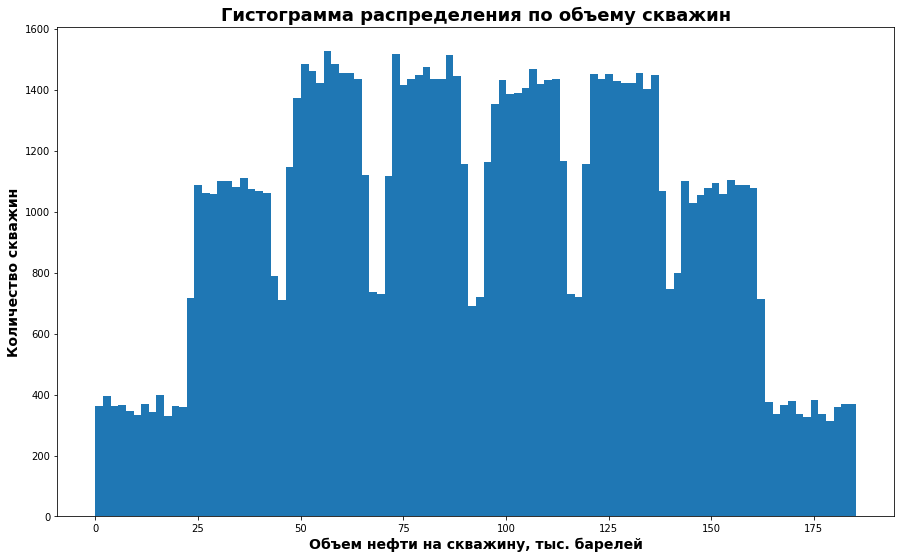

In [12]:
plt.figure(figsize=[15,9])
region1['product'].plot(kind = 'hist', bins = 100)

plt.xlabel("Объем нефти на скважину, тыс. барелей", fontsize=14, fontweight="bold")
plt.ylabel("Количество скважин", fontsize=14, fontweight="bold")

plt.title("Гистограмма распределения по объему скважин", fontsize=18, fontweight="bold")
plt.show()

### Второй регион

In [13]:
region2.head(10)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


In [14]:
region2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [15]:
region2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [16]:
region2.duplicated().sum()

0

In [17]:
region2 = region2.drop(['id'], axis=1)

In [18]:
region2.head(10)

,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305
5,-3.327590,-2.205276,3.003647,84.038886
6,-11.142655,-10.133399,4.002382,110.992147
7,4.234715,-0.001354,2.004588,53.906522
8,13.355129,-0.332068,4.998647,134.766305
9,1.069227,-11.025667,4.997844,137.945408


In [19]:
region2.query('product == 0').value_counts('product')

product
0.0    8235
dtype: int64

In [20]:
print('Доля пропусков {0:.2%}'.format(len(region2.query('product == 0'))/len(region2)))

Доля пропусков 8.24%


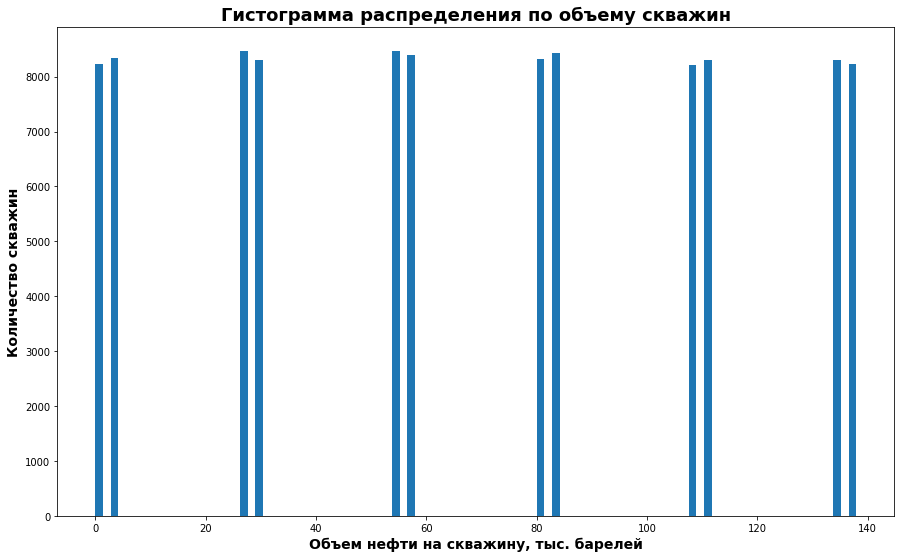

In [21]:
plt.figure(figsize=[15,9])
region2['product'].plot(kind = 'hist', bins = 100)

plt.xlabel("Объем нефти на скважину, тыс. барелей", fontsize=14, fontweight="bold")
plt.ylabel("Количество скважин", fontsize=14, fontweight="bold")

plt.title("Гистограмма распределения по объему скважин", fontsize=18, fontweight="bold")
plt.show()

В датафрейме пропусков, дупликатов нет. Столбец `id` не будет участвовать в обучении модели, поэтому было принято решение удалить его.

### Третий регион

In [22]:
region3.head(10)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


In [23]:
region3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [24]:
region3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [25]:
region3 = region3.drop(['id'], axis=1)

In [26]:
region3.duplicated().sum()

0

In [27]:
region3.query('product == 0').value_counts('product')

product
0.0    1
dtype: int64

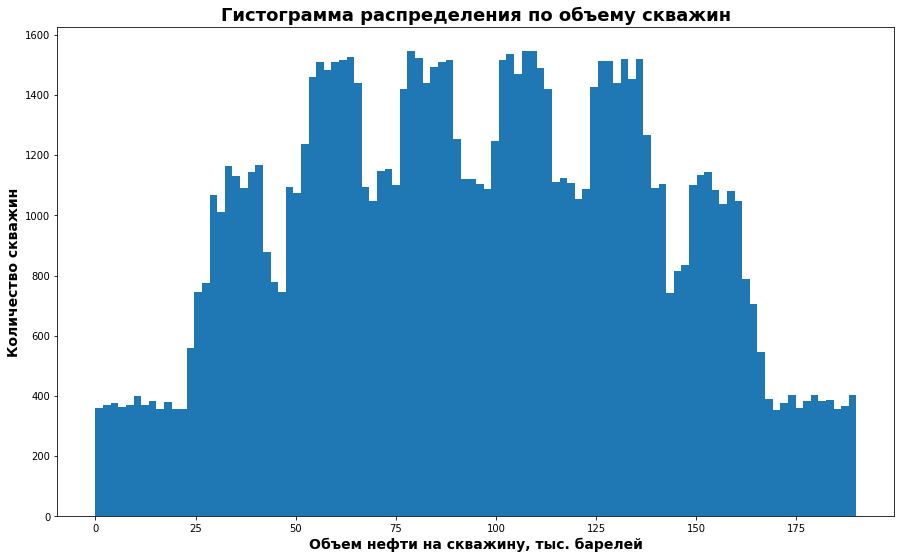

In [28]:
plt.figure(figsize=[15,9])
region3['product'].plot(kind = 'hist', bins = 100)

plt.xlabel("Объем нефти на скважину, тыс. барелей", fontsize=14, fontweight="bold")
plt.ylabel("Количество скважин", fontsize=14, fontweight="bold")

plt.title("Гистограмма распределения по объему скважин", fontsize=18, fontweight="bold")
plt.show()

В датафрейме пропусков, дупликатов нет. Столбец `id` не будет участвовать в обучении модели, поэтому было принято решение удалить его.

### Вывод

Данные были подготовлены к дальнейшему обучению моделей. Пропусков и дубликатов не обнаружено. Во всех таблицах удален столбец `id`. Он не участвует в обучении модели.

Также, во втором регионе присутствует очень много пустых скажен.

## Обучение и проверка модели

In [29]:
numeric = ['f0', 'f1', 'f2']

### Первый регион

In [30]:
region1.shape

(100000, 4)

In [31]:
features_region1 = region1.drop('product', axis = 1)
target_region1 = region1['product']

features_train_region1, features_valid_region1, target_train_region1, target_valid_region1 = train_test_split(
    features_region1, target_region1, test_size=0.25, random_state=12345)

scaler = StandardScaler()
scaler.fit(features_train_region1[numeric])
features_train_region1[numeric] = scaler.transform(features_train_region1[numeric])
features_valid_region1[numeric] = scaler.transform(features_valid_region1[numeric])

print('Размер обучающей выборки:', features_train_region1.shape)
print('Размер валидационной выборки:', features_valid_region1.shape)

Размер обучающей выборки: (75000, 3)
Размер валидационной выборки: (25000, 3)


In [32]:
model = LinearRegression(normalize=False)
model.fit(features_train_region1, target_train_region1)
predictions_region1 = model.predict(features_valid_region1)
rmse_region1 = mean_squared_error(target_valid_region1, predictions_region1) ** 0.5
average_product_region1 = sum(predictions_region1)/len(predictions_region1)
print('Cредний запас предсказанного сырья первого региона: {0:.2f} тысяч бареллей'.format(average_product_region1))
print("RMSE первого региона: {0:.2f}".format(rmse_region1))
predictions_region1_s = pd.Series(predictions_region1)

Cредний запас предсказанного сырья первого региона: 92.59 тысяч бареллей
RMSE первого региона: 37.58


### Второй регион

In [33]:
features_region2 = region2.drop('product', axis = 1)
target_region2 = region2['product']

features_train_region2, features_valid_region2, target_train_region2, target_valid_region2 = train_test_split(
    features_region2, target_region2, test_size=0.25, random_state=12345)

scaler = StandardScaler()
scaler.fit(features_train_region2[numeric])
features_train_region2[numeric] = scaler.transform(features_train_region2[numeric])
features_valid_region2[numeric] = scaler.transform(features_valid_region2[numeric])

print('Размер обучающей выборки:', features_train_region2.shape)
print('Размер валидационной выборки:', features_valid_region2.shape)

Размер обучающей выборки: (75000, 3)
Размер валидационной выборки: (25000, 3)


In [34]:
model = LinearRegression(normalize=False)
model.fit(features_train_region2, target_train_region2)
predictions_region2 = model.predict(features_valid_region2)
rmse_region2 = mean_squared_error(target_valid_region2, predictions_region2) ** 0.5
average_product_region2 = sum(predictions_region2)/len(predictions_region2)
print('Cредний запас предсказанного сырья второго региона: {0:.2f} тысяч бареллей'.format(average_product_region2))
print("RMSE второго региона: {0:.2f}".format(rmse_region2))
predictions_region2_s = pd.Series(predictions_region2)

Cредний запас предсказанного сырья второго региона: 68.73 тысяч бареллей
RMSE второго региона: 0.89


### Третий регион

In [35]:
features_region3 = region3.drop('product', axis = 1)
target_region3 = region3['product']

features_train_region3, features_valid_region3, target_train_region3, target_valid_region3 = train_test_split(
    features_region3, target_region3, test_size=0.25, random_state=12345)

scaler = StandardScaler()
scaler.fit(features_train_region3[numeric])
features_train_region3[numeric] = scaler.transform(features_train_region3[numeric])
features_valid_region3[numeric] = scaler.transform(features_valid_region3[numeric])

print('Размер обучающей выборки:', features_train_region3.shape)
print('Размер валидационной выборки:', features_valid_region3.shape)

Размер обучающей выборки: (75000, 3)
Размер валидационной выборки: (25000, 3)


In [36]:
model = LinearRegression(normalize=False)
model.fit(features_train_region3, target_train_region3)
predictions_region3 = model.predict(features_valid_region3)
rmse_region3 = mean_squared_error(target_valid_region3, predictions_region3) ** 0.5
average_product_region3 = sum(predictions_region3)/len(predictions_region3)
print('Cредний запас предсказанного сырья третьего региона: {0:.2f} тысяч бареллей'.format(average_product_region3))
print("RMSE третьего региона: {0:.2f}".format(rmse_region3))
predictions_region3_s = pd.Series(predictions_region3)

Cредний запас предсказанного сырья третьего региона: 94.97 тысяч бареллей
RMSE третьего региона: 40.03


### Вывод

In [37]:
print('Первый регион')
print('Cредний запас предсказанного сырья первого региона: {0:.2f} тысяч бареллей'.format(average_product_region1))
print("RMSE первого региона: {0:.2f}".format(rmse_region1))
print('---------------')
print('Второй регион')
print('Cредний запас предсказанного сырья второго региона: {0:.2f} тысяч бареллей'.format(average_product_region2))
print("RMSE второго региона: {0:.2f}".format(rmse_region2))
print('---------------')
print('Третий регион')
print('Cредний запас предсказанного сырья третьего региона: {0:.2f} тысяч бареллей'.format(average_product_region3))
print("RMSE третьего региона: {0:.2f}".format(rmse_region3))

Первый регион
Cредний запас предсказанного сырья первого региона: 92.59 тысяч бареллей
RMSE первого региона: 37.58
---------------
Второй регион
Cредний запас предсказанного сырья второго региона: 68.73 тысяч бареллей
RMSE второго региона: 0.89
---------------
Третий регион
Cредний запас предсказанного сырья третьего региона: 94.97 тысяч бареллей
RMSE третьего региона: 40.03


По средним запасам предсказанного сырья лидирует третий регион - 94.97

Хуже всего по средним запасам предсказанного сырья первый регион - 68.73


Лучше всего модель предсказала запасы во втором регионе (RMSE - 0.89), далее в первом и третьем соотвественно. Но во втором регионе присутствуют очень большое количество нулевых данных, возможно из-за этого модель лучше обучилась.

## Подготовка к расчёту прибыли

* При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
* Бюджет на разработку скважин в регионе — 10 млрд рублей.
* При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

### Все ключевые значения для расчётов сохраните в отдельных переменных.

In [38]:
budget = 10**10 # бюджет
exploration_research = 500 # выборка скважин
exploration_research_max = 200 # количество скважин для разработки
price_per_barrel = 45 * 10**4 # стоимость 1 барреля
bootstrap_count = 1000
mln = 10**6

### Достаточный объём сырья для безубыточной разработки новой скважины.

In [39]:
min_barrels = budget/(price_per_barrel*exploration_research_max)
print("Минимальное количество барелей в каждой скважине: {0:.2f} тыс. баррелей".format(min_barrels))

Минимальное количество барелей в каждой скважине: 111.11 тыс. баррелей


### Вывод

Минимальное количество барелей в каждой скважине должен быть 111.11 тыс. баррелей. Средние показатели по регионам: 92.53, 68.60, 94.98. Как видно графикам, что у всех регионов есть часть месторождений, которые проходят минимальный порог.

## Функция для расчёта прибыли по выбранным скважинам и предсказаниям модели:

* Выберем скважины с максимальными значениями предсказаний. Количество скважин зависит от бюджета компании и стоимости разработки одной скважины. В нашем случае выберем случайно 500 точек и отберём 200 с максимальным показателем объёма сырья
* Просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям.
* Рассчитаем прибыль для полученного объёма сырья.

In [40]:
def revenue(target, prediction_s, count):
    
    probs_sorted = prediction_s.sort_values(ascending=False) 
    selected = (target[probs_sorted.index][:count].sum() * price_per_barrel)
    margin = selected - budget
    return margin

## Риски и прибыль для каждого региона

### Первый регион

In [41]:
state = np.random.RandomState(12345)
    

def bootstrap (target, predictions):
    values = []
    for i in range(bootstrap_count):
        target_subsample = target.reset_index(drop=True).sample(n = exploration_research, random_state = state, replace=True)
        probs_sub = predictions[target_subsample.index]
        rev = revenue(target_subsample, probs_sub, exploration_research_max)
        values.append(rev)
    values = pd.Series(values)
    confidence_interval = (round(values.quantile(0.05)/mln, 2), round(values.quantile(0.95)/mln, 2))
    mean = values.mean()
    outcome_risk = len(values[values < 0])/len(values)*100
    
    print("Средняя выручка: {0:.2f} млн. руб".format(mean/mln))
    print("Доверительный интервал:", confidence_interval, 'млн.руб')
    print("Риск убытка: {0:.2f} % ".format(outcome_risk))
    plt.figure(figsize=[15,9])
    values.plot(kind = 'hist', bins = 50, grid = True)

    plt.xlabel("Выручка, млн.руб", fontsize=14, fontweight="bold")
    plt.ylabel("Количество скважин", fontsize=14, fontweight="bold")

    plt.title("Гистограмма распределения по средней выручке", fontsize=18, fontweight="bold")
    plt.show()

Средняя выручка: 425.94 млн. руб
Доверительный интервал: (-31.8, 881.34) млн.руб
Риск убытка: 6.00 % 


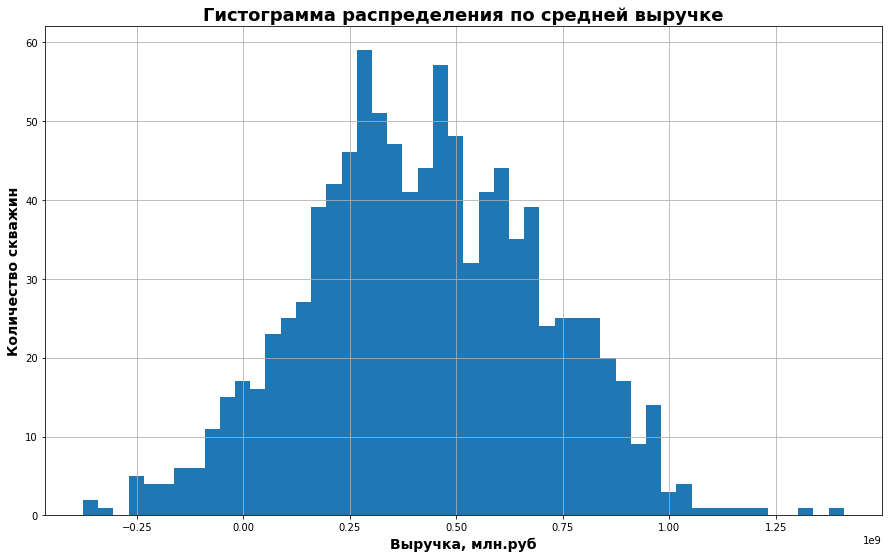

In [42]:
bootstrap(target_valid_region1, predictions_region1_s)

### Второй регион

Средняя выручка: 518.26 млн. руб
Доверительный интервал: (186.59, 888.64) млн.руб
Риск убытка: 0.30 % 


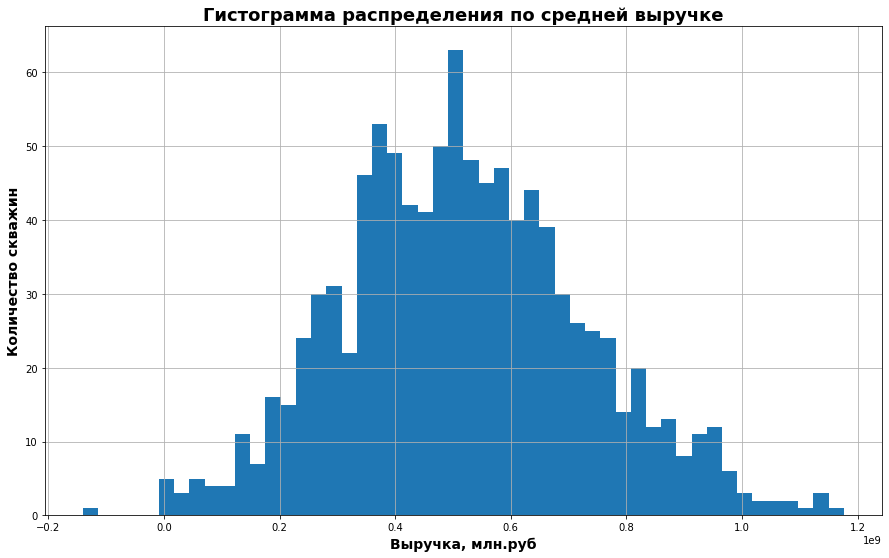

In [43]:
bootstrap(target_valid_region2, predictions_region2_s)

### Третий регион

Средняя выручка: 420.19 млн. руб
Доверительный интервал: (-26.09, 909.6) млн.руб
Риск убытка: 6.20 % 


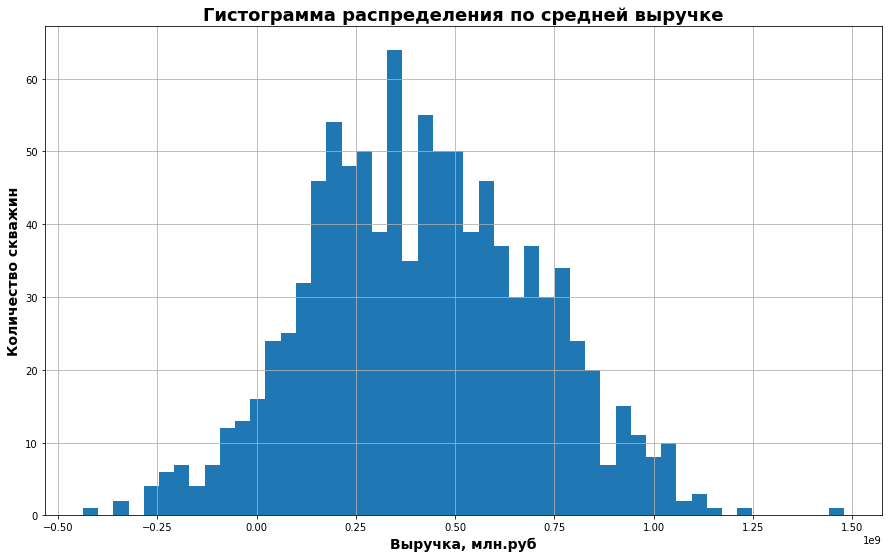

In [44]:
bootstrap(target_valid_region3, predictions_region3_s)

### Вывод

При применении техники bootstrap:
* Оценка средней прибыли максимальна для второго региона (518.26 млн. руб).
* Только второй регион прогнозирует прибыльную разработку по 95% доверительному интервалу.
* Только второй регион проходит по пороге риска убытка (установлен 1.5%)
* Рекомендуем регион 2 для разработки.

## Вывод

При начальном построении модели и предсказаний:
* В первом и втором регионе достаточно высокий средний показатель запаса предсказанного сырья(92.59 и 94.97 соответственно). Однако RMSE для данных регионов также высок (37.8 и 40.03 соответственно). Это свидетельствует о неоднозначности показателя, неточности модели регрессии.
* Во втором регине ниже средний запас предсказанного сырья (68.73 тысяч бареллей), но крайне низкий RMSE (0.89). Это говорит о точности предсказаний и качестве построенной модели.
* Средние показатели предсказанного сырья для одной скважины ниже теоретически необходимых (111.11)

При применении техники bootstrap:
* Оценка средней прибыли максимальна для второго региона (518.26 млн. руб).
* Только второй регион прогнозирует прибыльную разработку по 95% доверительному интервалу.
* Только второй регион проходит по пороге риска убытка (установлен 1.5%)
* Рекомендуем регион 1 для разработки.

Проанализировав все данные, мы рекомендуем второй регион для разработки месторождений.